### CNN Model for the Phishing Websites group project

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
import tensorflow as tf
from tensorflow.keras import layers, models

In [21]:
data = arff.loadarff('/Training Dataset.arff')
df = pd.DataFrame(data[0])
df = df.apply(lambda col: col.str.decode('utf-8').str.strip("'"))

df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [63]:
X = df.drop("Result", axis=1)
Y = df['Result']
map = {1:1, -1:0}

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)
Y_test = Y_test.astype(float)
Y_train = Y_train.astype(float)
Y_train = np.array([map[y] for y in Y_train]).astype(float)
Y_test = np.array([map[y] for y in Y_test]).astype(float)


In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Reshape the input data to be 3D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = models.Sequential()

model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu'))


model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=50, batch_size=64)

Epoch 1/50
139/139 [==============================] - 2s 4ms/step - loss: 0.3131 - accuracy: 0.8589
Epoch 2/50
139/139 [==============================] - 1s 4ms/step - loss: 0.1922 - accuracy: 0.9244
Epoch 3/50
139/139 [==============================] - 1s 4ms/step - loss: 0.1703 - accuracy: 0.9307
Epoch 4/50
139/139 [==============================] - 1s 4ms/step - loss: 0.1573 - accuracy: 0.9352
Epoch 5/50
139/139 [==============================] - 1s 4ms/step - loss: 0.1525 - accuracy: 0.9351
Epoch 6/50
139/139 [==============================] - 1s 4ms/step - loss: 0.1428 - accuracy: 0.9393
Epoch 7/50
139/139 [==============================] - 1s 4ms/step - loss: 0.1358 - accuracy: 0.9428
Epoch 8/50
139/139 [==============================] - 1s 4ms/step - loss: 0.1331 - accuracy: 0.9414
Epoch 9/50
139/139 [==============================] - 1s 5ms/step - loss: 0.1304 - accuracy: 0.9439
Epoch 10/50
139/139 [==============================] - 1s 6ms/step - loss: 0.1196 - accuracy: 0.9488

In [57]:

predictions = model.predict(X_test)
Y_test = np.array([map[y] for y in Y_test]).astype(np.float64)
predictions_binary = np.round(predictions)
accuracy = accuracy_score(Y_test, predictions_binary)
precision = precision_score(Y_test, predictions_binary, average='macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")



70/70 [==============================] - 0s 4ms/step
Accuracy: 0.9579375848032564
Precision: 0.9580175219861597


### Attempts at improving the score for the above base model

In [67]:
#Preprocessing data again to train a new model

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)
Y_train = Y_train.astype(float)
Y_test = Y_test.astype(float)
Y_train = np.array([map[y] for y in Y_train]).astype(float)
Y_test = np.array([map[y] for y in Y_test]).astype(float)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# New Model
model = models.Sequential()
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(32, 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

predictions = model.predict(X_test)
predictions_binary = np.round(predictions)
accuracy = accuracy_score(Y_test, predictions_binary)
precision = precision_score(Y_test, predictions_binary, average='macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")



Epoch 1/50
111/111 [==============================] - 2s 8ms/step - loss: 0.4310 - accuracy: 0.8004 - val_loss: 0.2277 - val_accuracy: 0.9158
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 0.2365 - accuracy: 0.9063 - val_loss: 0.1831 - val_accuracy: 0.9327
Epoch 3/50
111/111 [==============================] - 1s 8ms/step - loss: 0.2059 - accuracy: 0.9225 - val_loss: 0.1887 - val_accuracy: 0.9293
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 0.1923 - accuracy: 0.9255 - val_loss: 0.1698 - val_accuracy: 0.9373
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 0.1791 - accuracy: 0.9282 - val_loss: 0.1619 - val_accuracy: 0.9384
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.1742 - accuracy: 0.9340 - val_loss: 0.1583 - val_accuracy: 0.9384
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.1675 - accuracy: 0.9317 - val_loss: 0.1545 - val_accuracy: 0.9333
Epoch 

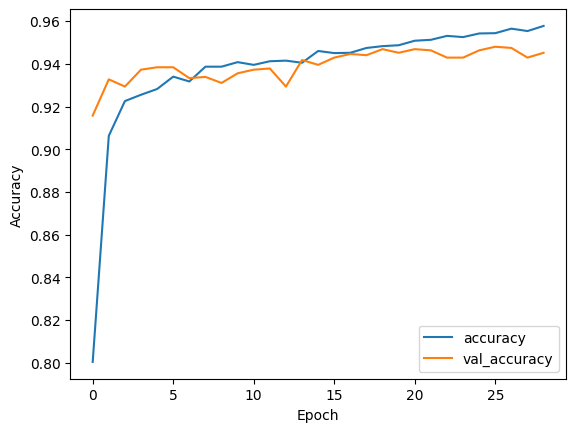

In [69]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
